# Objective:--> This is a usecase where we aim to find  final number of elected MP's in a district/national-level


In [1]:
#importing libraries for visiualizing and understanding dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
elec_df=pd.read_csv('ElectionData.csv')

# Finding insights of the data and what it consist of

In [3]:
elec_df.head()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
3,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5
4,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12


In [4]:
elec_df.tail()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
21638,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,NC,0,0.19,0.20,332,0,0
21639,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,PNR,0,0.18,0.19,326,0,0
21640,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,MPT,0,0.14,0.15,256,0,0
21641,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,PTP,0,0.13,0.14,239,0,0
21642,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,JPP,0,0.07,0.07,118,0,0


In [5]:
#finding the number of rows and columns in the dataset
elec_df.shape

(21643, 28)

In [6]:
#finding the information about the dataset
elec_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21643 entries, 0 to 21642
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TimeElapsed               21643 non-null  int64  
 1   time                      21643 non-null  object 
 2   territoryName             21643 non-null  object 
 3   totalMandates             21643 non-null  int64  
 4   availableMandates         21643 non-null  int64  
 5   numParishes               21643 non-null  int64  
 6   numParishesApproved       21643 non-null  int64  
 7   blankVotes                21643 non-null  int64  
 8   blankVotesPercentage      21643 non-null  float64
 9   nullVotes                 21643 non-null  int64  
 10  nullVotesPercentage       21643 non-null  float64
 11  votersPercentage          21643 non-null  float64
 12  subscribedVoters          21643 non-null  int64  
 13  totalVoters               21643 non-null  int64  
 14  pre.bl

# Attribute Information

TimeElapsed (Numeric): Time (minutes) passed since the first data acquisition
    
time (timestamp): Date and time of the data acquisition
    
territoryName (string): Short name of the location (district or nation-wide)
    
totalMandates (numeric): MP's elected at the moment
    
availableMandates (numeric): MP's left to elect at the moment
    
numParishes (numeric): Total number of parishes in this location
    
numParishesApproved (numeric): Number of parishes approved in this location
    
blankVotes (numeric): Number of blank votes
    
blankVotesPercentage (numeric): Percentage of blank votes
    
nullVotes (numeric): Number of null votes
    
nullVotesPercentage (numeric): Percentage of null votes
    
votersPercentage (numeric): Percentage of voters
    
subscribedVoters (numeric): Number of subscribed voters in the location
    
totalVoters (numeric): Percentage of blank votes
    
pre.blankVotes (numeric): Number of blank votes (previous election)
    
pre.blankVotesPercentage (numeric): Percentage of blank votes (previous election)
    
pre.nullVotes (numeric): Number of null votes (previous election)
    
pre.nullVotesPercentage (numeric): Percentage of null votes (previous election)
    
pre.votersPercentage (numeric): Percentage of voters (previous election)
    
pre.subscribedVoters (numeric): Number of subscribed voters in the location (previous election)
    
pre.totalVoters (numeric): Percentage of blank votes (previous election)
    
Party (string): Political Party
    
Mandates (numeric): MP's elected at the moment for the party in a given district
    
Percentage (numeric): Percentage of votes in a party
    
validVotesPercentage (numeric): Percentage of valid votes in a party
    
Votes (numeric): Percentage of party votes
    
Hondt (numeric): Number of MP's according to the distribution of votes now
    
FinalMandates (numeric): Target: final number of elected MP's in a district/national-level

In [7]:
#finding the different territory presnet in the dataset and their count
print(elec_df['territoryName'].unique())
print("\n")
print(elec_df['territoryName'].value_counts())

['Território Nacional' 'Aveiro' 'Beja' 'Braga' 'Bragança' 'Castelo Branco'
 'Coimbra' 'Évora' 'Faro' 'Guarda' 'Leiria' 'Lisboa' 'Madeira'
 'Portalegre' 'Porto' 'Santarém' 'Setúbal' 'Viana do Castelo' 'Vila Real'
 'Viseu' 'Açores']


Porto                  1134
Leiria                 1134
Território Nacional    1134
Braga                  1134
Aveiro                 1080
Madeira                1080
Coimbra                1080
Viana do Castelo       1080
Setúbal                1080
Viseu                  1080
Lisboa                 1080
Guarda                 1026
Faro                   1026
Santarém               1026
Évora                  1026
Bragança                972
Castelo Branco          972
Beja                    918
Portalegre              918
Vila Real               864
Açores                  799
Name: territoryName, dtype: int64


In [8]:
#finding the different political party taking part presnet in the dataset and their count
print(elec_df['Party'].unique())
print("\n")
print(elec_df['Party'].value_counts())

['PS' 'PPD/PSD' 'B.E.' 'CDS-PP' 'PCP-PEV' 'PAN' 'CH' 'R.I.R.' 'PCTP/MRPP'
 'A' 'L' 'IL' 'JPP' 'NC' 'PDR' 'PNR' 'PURP' 'PPM' 'MPT' 'PTP' 'MAS']


IL           1127
PNR          1127
PCTP/MRPP    1127
PPD/PSD      1127
PS           1127
CH           1127
PDR          1127
PAN          1127
A            1127
CDS-PP       1127
PCP-PEV      1127
L            1127
B.E.         1127
PPM          1073
R.I.R.       1026
MPT          1019
PTP          1019
PURP          972
NC            972
JPP           486
MAS           425
Name: Party, dtype: int64


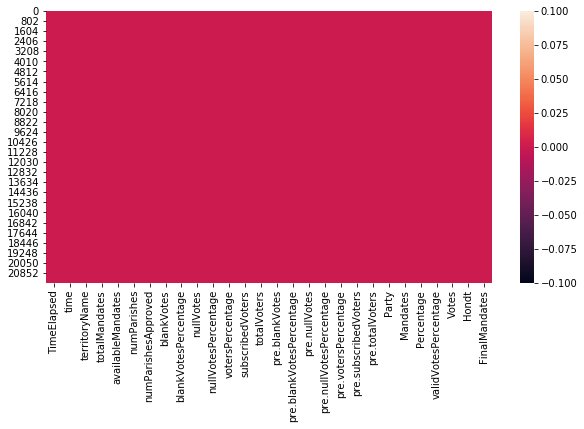

In [9]:
#cheking for null values
plt.figure(figsize=(10,5))
sns.heatmap(elec_df.isnull())

In [10]:
elec_df.isnull().sum()

TimeElapsed                 0
time                        0
territoryName               0
totalMandates               0
availableMandates           0
numParishes                 0
numParishesApproved         0
blankVotes                  0
blankVotesPercentage        0
nullVotes                   0
nullVotesPercentage         0
votersPercentage            0
subscribedVoters            0
totalVoters                 0
pre.blankVotes              0
pre.blankVotesPercentage    0
pre.nullVotes               0
pre.nullVotesPercentage     0
pre.votersPercentage        0
pre.subscribedVoters        0
pre.totalVoters             0
Party                       0
Mandates                    0
Percentage                  0
validVotesPercentage        0
Votes                       0
Hondt                       0
FinalMandates               0
dtype: int64

# Bivariate Analysis

Text(0.5, 1.0, 'Count of final Mandate')

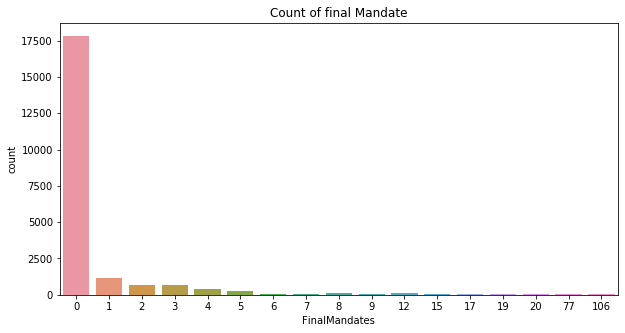

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(elec_df['FinalMandates'])
plt.title('Count of final Mandate')

Text(0.5, 1.0, 'Final Mandate According to Territory')

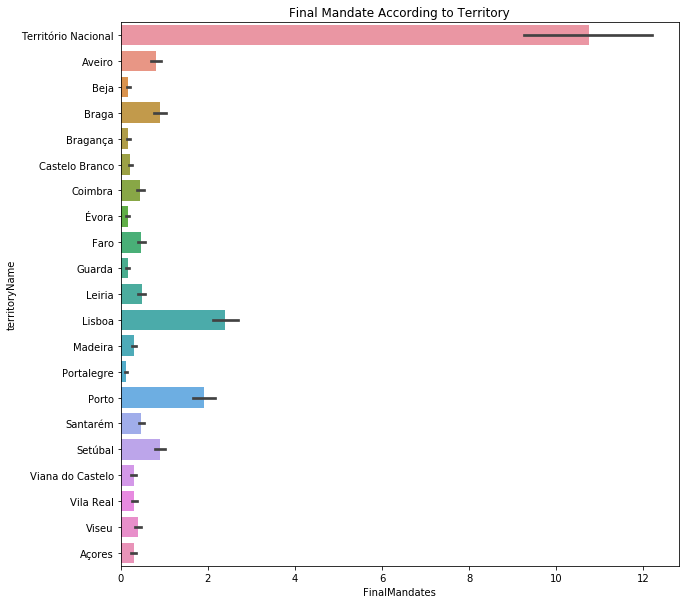

In [12]:
plt.figure(figsize=(10,10))
sns.barplot(elec_df['FinalMandates'],elec_df['territoryName'])
plt.title('Final Mandate According to Territory')

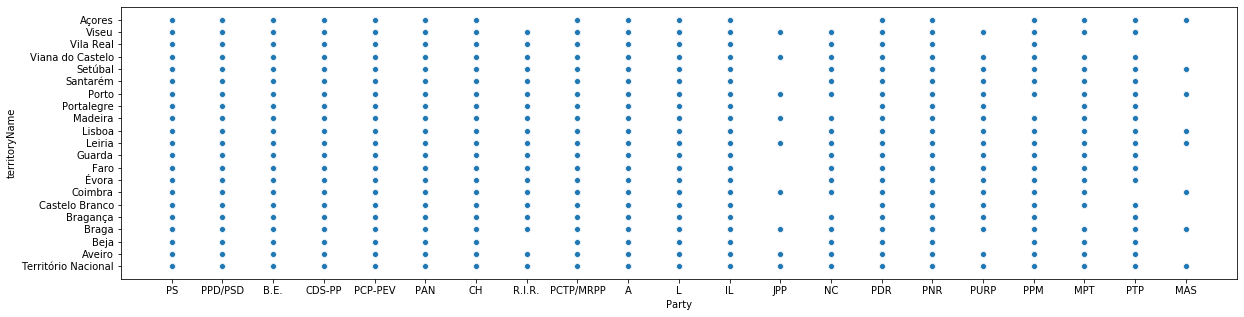

In [13]:
plt.figure(figsize=(20,5))
sns.scatterplot(elec_df['Party'],elec_df['territoryName'])

In [14]:
#Almost every party had fought the election in every territory except few

Text(0.5, 1.0, 'Total voters in every territory')

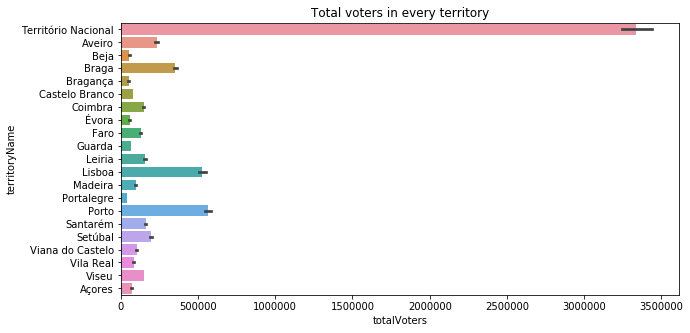

In [15]:
plt.figure(figsize=(10,5))
sns.barplot(elec_df['totalVoters'],elec_df['territoryName'])
plt.title('Total voters in every territory')

<Figure size 720x360 with 0 Axes>

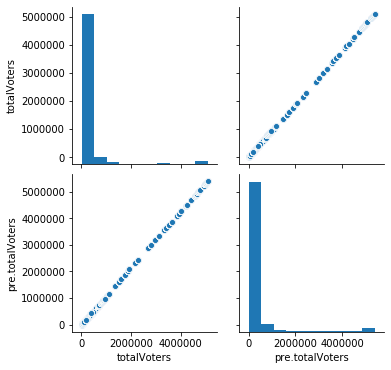

In [16]:
plt.figure(figsize=(10,5))
sns.pairplot(elec_df,vars=['totalVoters','pre.totalVoters'])
plt.show()

In [17]:
#there is not much change in the number of voters between the two electionb

Text(0.5, 1.0, 'Number of approved parishes in every territory')

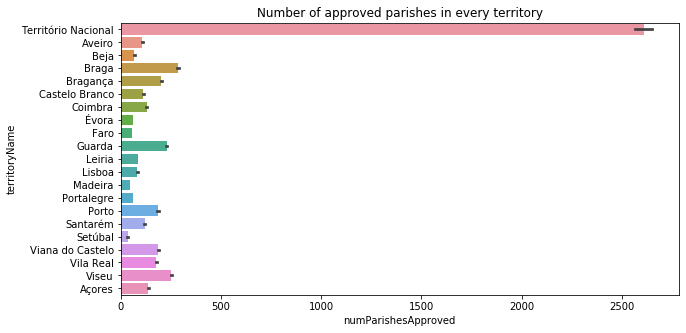

In [18]:
plt.figure(figsize=(10,5))
sns.barplot(elec_df['numParishesApproved'],elec_df['territoryName'])
plt.title('Number of approved parishes in every territory')

Text(0.5, 1.0, 'Available Mandates in every territory')

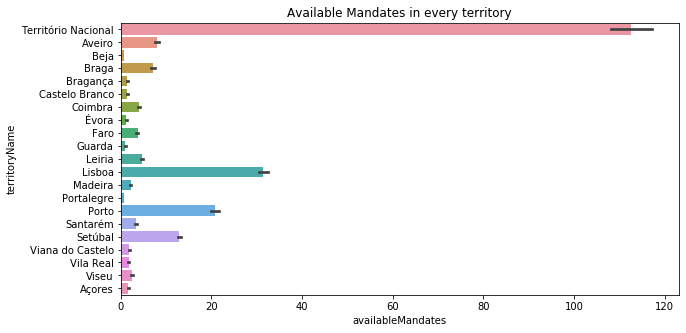

In [19]:
plt.figure(figsize=(10,5))
sns.barplot(elec_df['availableMandates'],elec_df['territoryName'])
plt.title('Available Mandates in every territory')

Text(0.5, 1.0, 'Blank Votes in every territory')

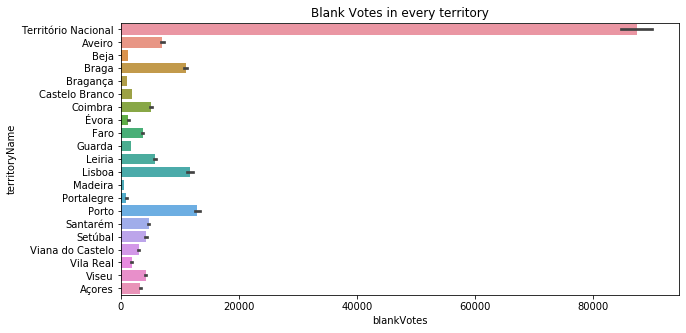

In [20]:
plt.figure(figsize=(10,5))
sns.barplot(elec_df['blankVotes'],elec_df['territoryName'])
plt.title('Blank Votes in every territory')

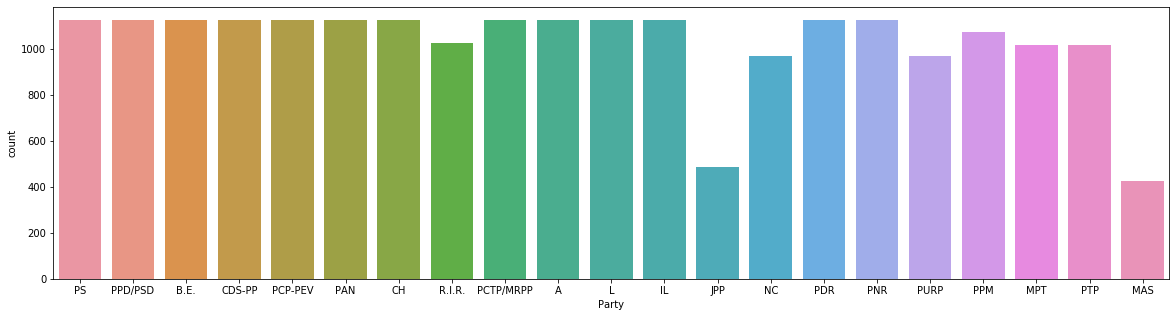

In [21]:
plt.figure(figsize=(20,5))
sns.countplot(elec_df['Party'])

Text(0.5, 1.0, 'Final mandates w.r.t To party')

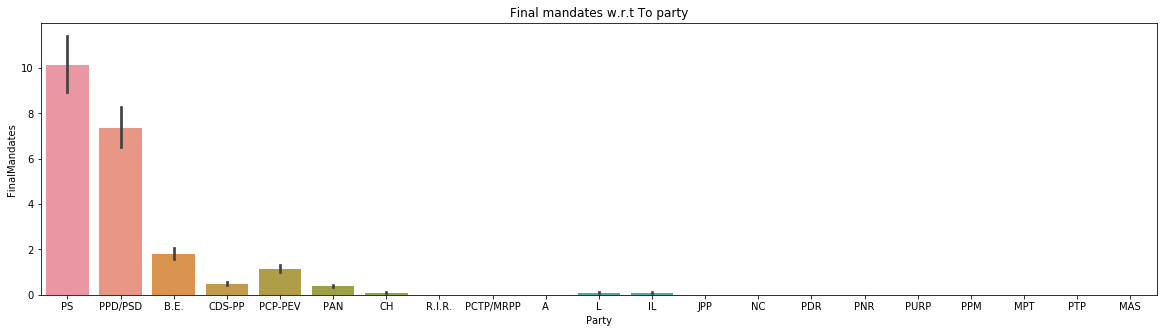

In [22]:
plt.figure(figsize=(20,5))
sns.barplot(elec_df['Party'],elec_df['FinalMandates'])
plt.title('Final mandates w.r.t To party')

In [23]:
elec_df.columns


Index(['TimeElapsed', 'time', 'territoryName', 'totalMandates',
       'availableMandates', 'numParishes', 'numParishesApproved', 'blankVotes',
       'blankVotesPercentage', 'nullVotes', 'nullVotesPercentage',
       'votersPercentage', 'subscribedVoters', 'totalVoters', 'pre.blankVotes',
       'pre.blankVotesPercentage', 'pre.nullVotes', 'pre.nullVotesPercentage',
       'pre.votersPercentage', 'pre.subscribedVoters', 'pre.totalVoters',
       'Party', 'Mandates', 'Percentage', 'validVotesPercentage', 'Votes',
       'Hondt', 'FinalMandates'],
      dtype='object')

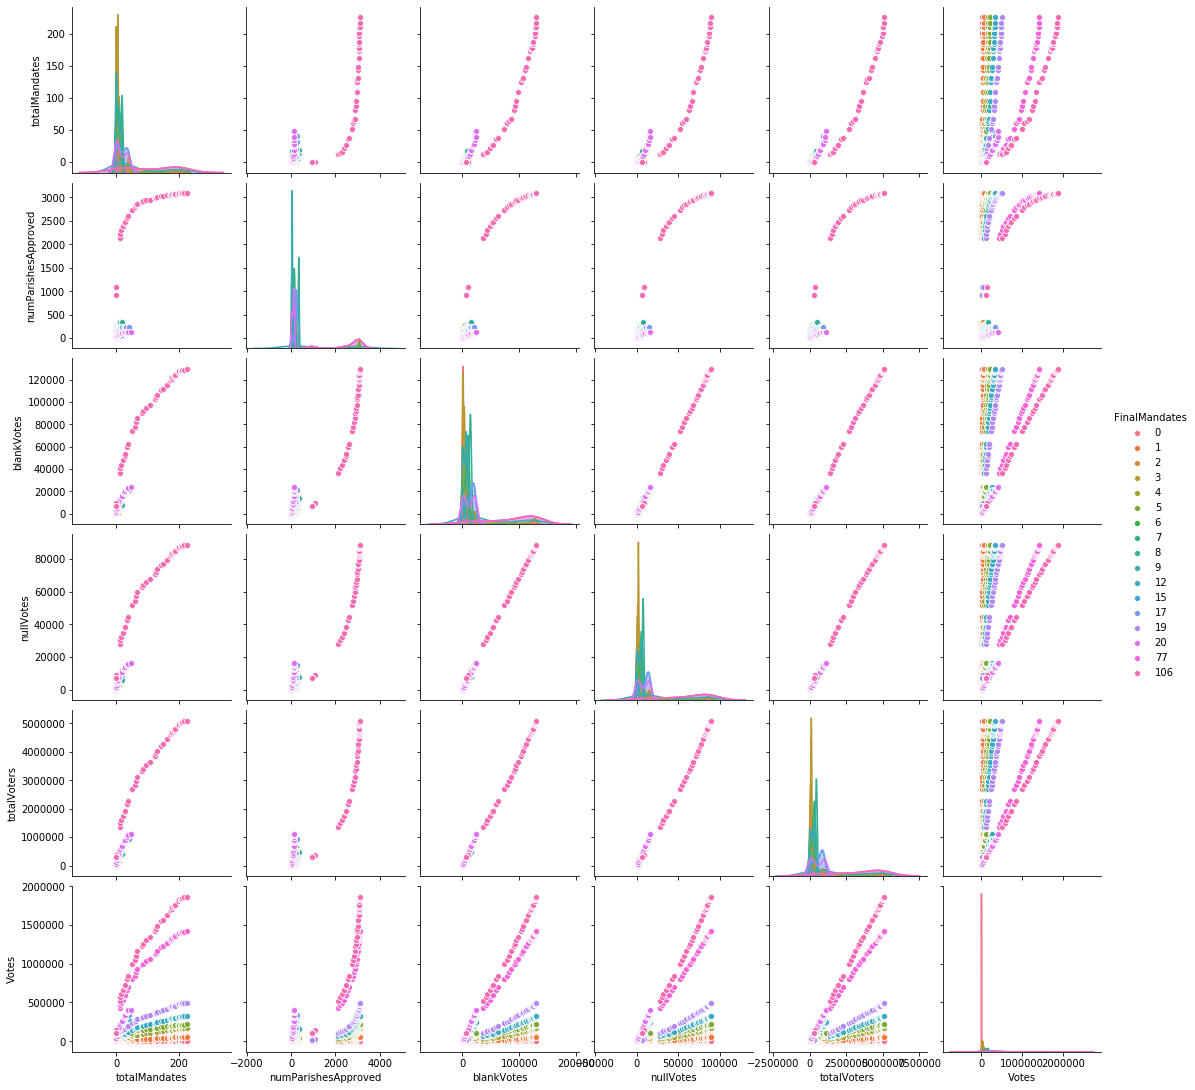

In [24]:
sns.pairplot(elec_df, hue='FinalMandates', vars=['totalMandates','numParishesApproved','blankVotes','nullVotes','totalVoters','Votes'])
plt.show()

In [25]:
#Changing the datatype of the totalMandates column from object type to int64
elec_df['totalMandates']=elec_df['totalMandates'].astype(int)

In [26]:
#Using label Encoder to the categorical variables to numeric form
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [27]:
elec_df['territoryName']=lb.fit_transform(elec_df['territoryName'])
elec_df['Party']=lb.fit_transform(elec_df['Party'])

In [28]:
#dropping TimeElapsed', 'time' and all the previous election column as they donot help in prediction of final mandates
elec_df.drop(['TimeElapsed', 'time','pre.blankVotes',
       'pre.blankVotesPercentage', 'pre.nullVotes', 'pre.nullVotesPercentage',
       'pre.votersPercentage', 'pre.subscribedVoters', 'pre.totalVoters',],axis=1,inplace=True)

In [29]:
elec_df.columns


Index(['territoryName', 'totalMandates', 'availableMandates', 'numParishes',
       'numParishesApproved', 'blankVotes', 'blankVotesPercentage',
       'nullVotes', 'nullVotesPercentage', 'votersPercentage',
       'subscribedVoters', 'totalVoters', 'Party', 'Mandates', 'Percentage',
       'validVotesPercentage', 'Votes', 'Hondt', 'FinalMandates'],
      dtype='object')

# Univariate Analysis

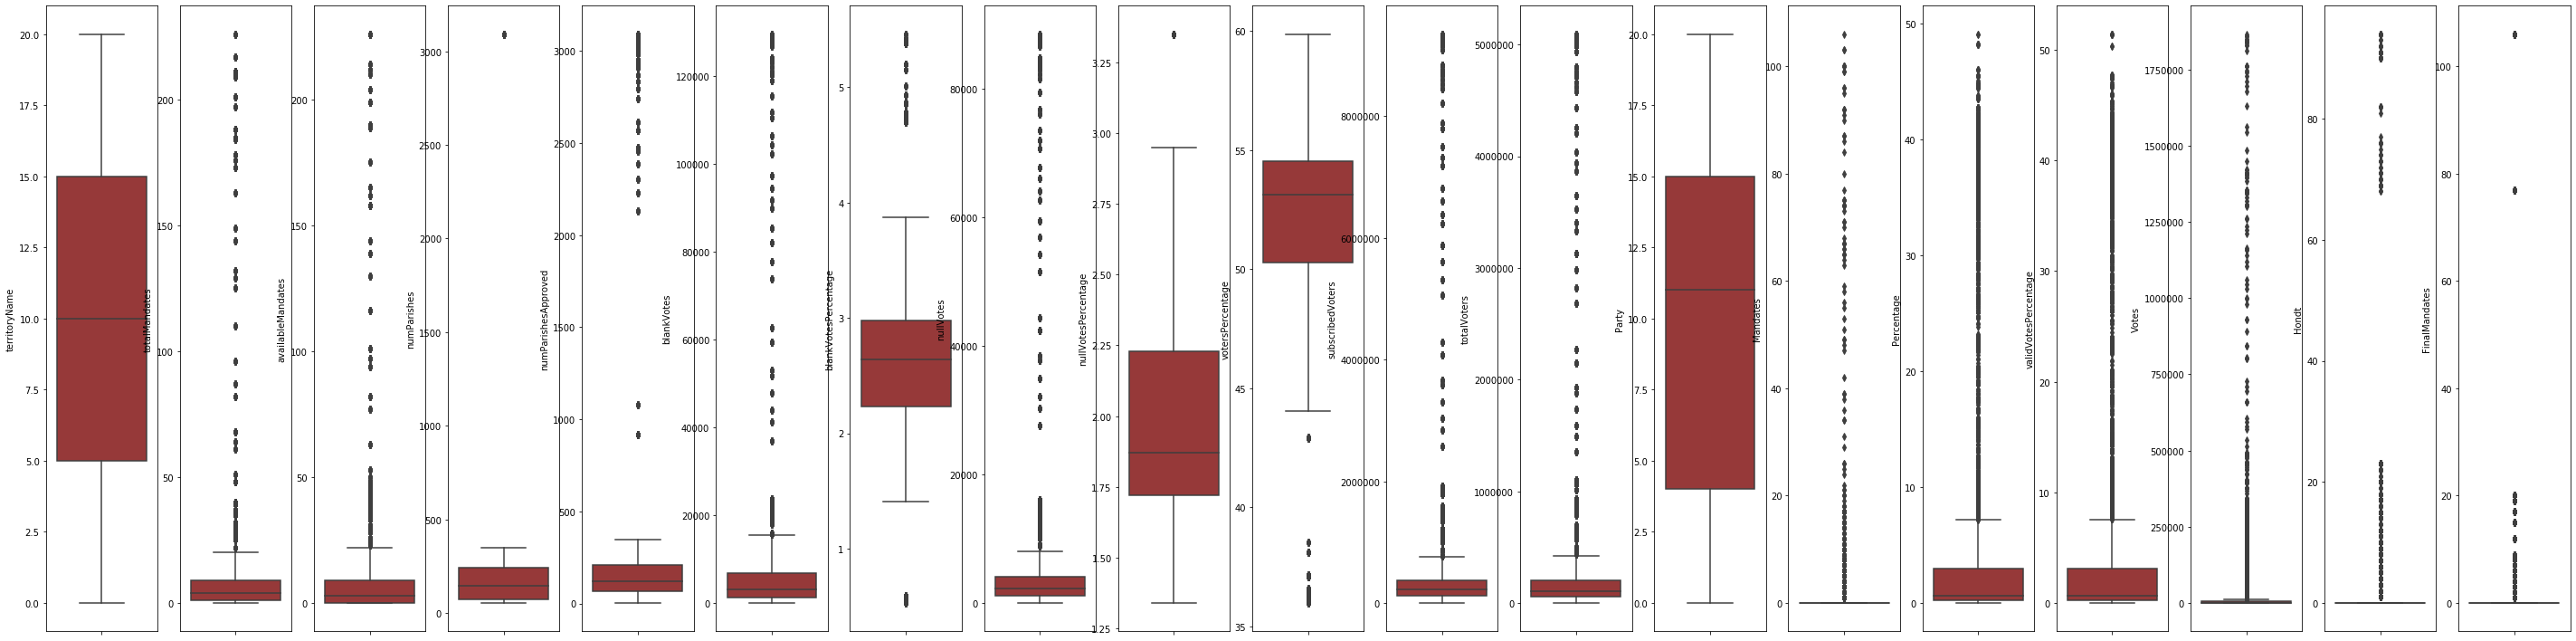

In [30]:
#using boxplot to see outliers and IQR range
collist=elec_df.columns.values
ncol=19
nrows=10
plt.figure(figsize=(50,150))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(elec_df[collist[i]],color='brown',orient='v')

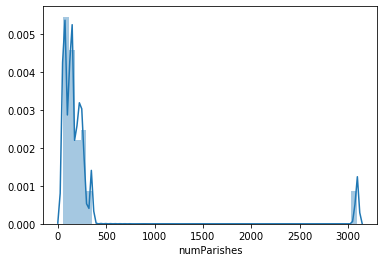

In [31]:
#cheking the distribution and skewness
sns.distplot(elec_df['numParishes'])

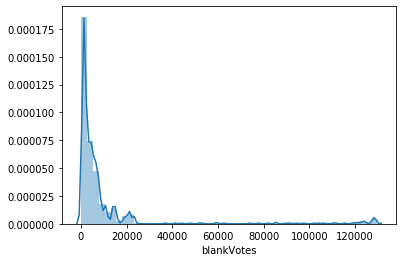

In [32]:
#cheking the distribution and skewness
sns.distplot(elec_df['blankVotes'])

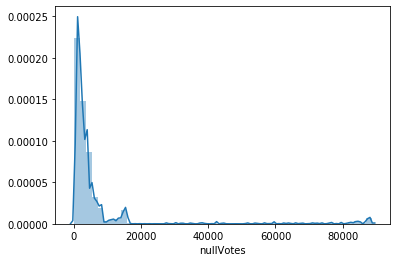

In [33]:
#cheking the distribution and skewness
sns.distplot(elec_df['nullVotes'])

# Statistical Analysis

In [34]:
elec_df.describe()

,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
count,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,2.164300e+04,2.164300e+04,21643.000000,21643.000000,21643.000000,21643.000000,2.164300e+04,21643.000000,21643.000000
mean,10.116851,11.544795,11.499284,309.956013,261.090237,8875.066673,2.621629,6148.068752,1.961471,51.983722,6.275367e+05,3.390741e+05,10.096521,0.565495,4.968484,5.207232,1.585209e+04,1.126138,1.126138
std,5.985225,31.314567,31.738783,659.055911,583.377428,21484.874088,0.795289,14735.469269,0.375250,4.854380,1.525590e+06,8.290404e+05,6.129654,4.421804,10.379967,10.881108,9.310605e+04,6.293552,6.872644
min,0.000000,0.000000,0.000000,54.000000,3.000000,19.000000,0.530000,39.000000,1.340000,35.980000,5.767000e+03,2.833000e+03,0.000000,0.000000,0.020000,0.020000,1.000000e+00,0.000000,0.000000
25%,5.000000,1.000000,0.000000,75.000000,67.000000,1188.000000,2.230000,1094.000000,1.720000,50.290000,1.229870e+05,6.267100e+04,4.000000,0.000000,0.220000,0.230000,2.360000e+02,0.000000,0.000000
50%,10.000000,4.000000,3.000000,147.000000,120.000000,2998.000000,2.640000,2232.000000,1.870000,53.130000,2.289540e+05,1.060120e+05,11.000000,0.000000,0.620000,0.650000,7.900000e+02,0.000000,0.000000
75%,15.000000,9.000000,9.000000,242.000000,208.000000,6889.000000,2.980000,4121.000000,2.230000,54.550000,3.804890e+05,2.069180e+05,15.000000,0.000000,3.010000,3.160000,4.510000e+03,0.000000,0.000000
max,20.000000,226.000000,226.000000,3092.000000,3092.000000,129599.000000,5.460000,88539.000000,3.350000,59.870000,9.343084e+06,5.092424e+06,20.000000,106.000000,49.110000,51.420000,1.866407e+06,94.000000,106.000000


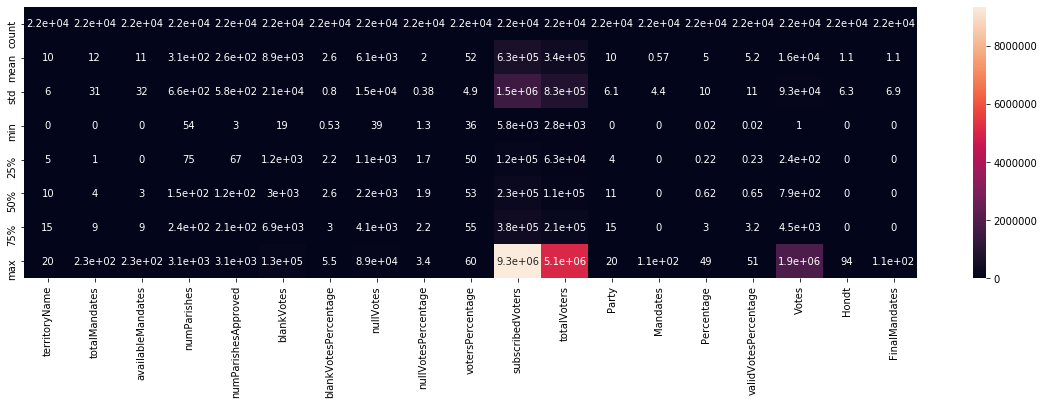

In [35]:
plt.figure(figsize=(20,5))
sns.heatmap(elec_df.describe(),annot=True)

In [36]:
elec_df.corr()

,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
territoryName,1.000000,0.172374,0.181563,0.223300,0.215599,0.178082,-0.302412,0.196554,-0.126432,0.104222,0.195483,0.193847,0.012263,0.057823,-0.003433,-0.004874,0.078520,0.084131,0.077042
totalMandates,0.172374,1.000000,0.217404,0.765877,0.873415,0.969988,-0.003149,0.967294,-0.165132,0.171317,0.974407,0.976336,-0.003111,0.336989,-0.010171,-0.010474,0.395617,0.288420,0.264117
availableMandates,0.181563,0.217404,1.000000,0.745472,0.562719,0.390638,-0.002806,0.407366,0.029915,0.112293,0.385828,0.379093,-0.001882,0.072320,-0.011083,-0.011052,0.152348,0.291310,0.266764
numParishes,0.223300,0.765877,0.745472,1.000000,0.954092,0.861279,0.032013,0.870240,0.013209,0.073855,0.856855,0.850881,-0.004013,0.257365,-0.010770,-0.010624,0.343593,0.359283,0.329009
numParishesApproved,0.215599,0.873415,0.562719,0.954092,1.000000,0.951265,0.035153,0.956142,-0.037416,0.081157,0.946191,0.940941,-0.003765,0.293795,-0.009840,-0.009767,0.380311,0.340901,0.312177
blankVotes,0.178082,0.969988,0.390638,0.861279,0.951265,1.000000,0.038503,0.998781,-0.150894,0.183970,0.998297,0.997951,-0.003826,0.326630,-0.011883,-0.012002,0.404003,0.322780,0.295583
blankVotesPercentage,-0.302412,-0.003149,-0.002806,0.032013,0.035153,0.038503,1.000000,0.006615,0.094047,-0.190778,0.001598,-0.002062,-0.019692,-0.000926,-0.006258,-0.002076,-0.001486,-0.001305,-0.001195
nullVotes,0.196554,0.967294,0.407366,0.870240,0.956142,0.998781,0.006615,1.000000,-0.136296,0.181411,0.998988,0.998405,-0.003172,0.325711,-0.011602,-0.011820,0.404195,0.326144,0.298663
nullVotesPercentage,-0.126432,-0.165132,0.029915,0.013209,-0.037416,-0.150894,0.094047,-0.136296,1.000000,-0.108855,-0.157263,-0.161816,0.007069,-0.056254,0.003301,0.005441,-0.066526,-0.032388,-0.029659
votersPercentage,0.104222,0.171317,0.112293,0.073855,0.081157,0.183970,-0.190778,0.181411,-0.108855,1.000000,0.173603,0.190476,0.014657,0.056553,-0.019836,-0.020966,0.076377,0.066665,0.061048


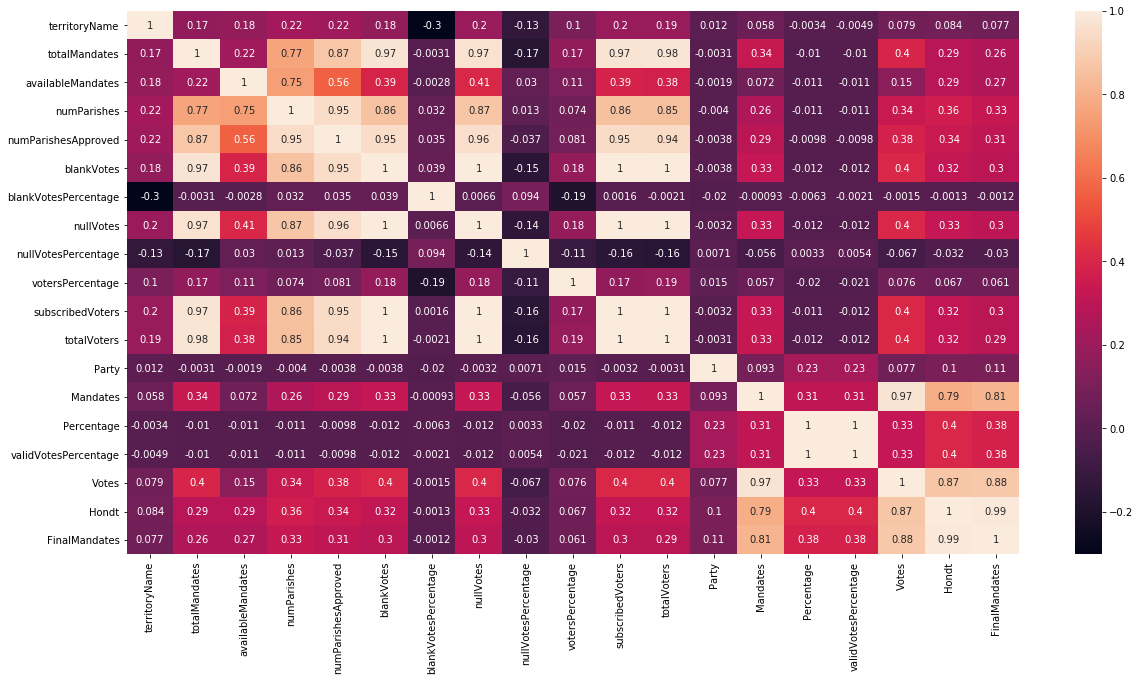

In [37]:
plt.figure(figsize=(20,10))
sns.heatmap(elec_df.corr(),annot=True)

In [38]:
#Cheking the skewness
elec_df.skew()

territoryName           -0.025884
totalMandates            5.150031
availableMandates        5.131572
numParishes              3.920433
numParishesApproved      4.238343
blankVotes               4.521940
blankVotesPercentage     0.069627
nullVotes                4.520945
nullVotesPercentage      0.855419
votersPercentage        -1.158029
subscribedVoters         4.568797
totalVoters              4.541364
Party                   -0.083536
Mandates                16.576658
Percentage               2.542328
validVotesPercentage     2.543122
Votes                   13.940573
Hondt                   11.489315
FinalMandates           12.402865
dtype: float64

# Removing Outliers and Skewness from the dataset

In [39]:
from scipy.stats import zscore
z=np.abs(zscore(elec_df))
print(z)

[[ 0.98296816  0.36868023  6.75847178 ...  1.4192844  14.75732693
  15.25996213]
 [ 0.98296816  0.36868023  6.75847178 ...  1.211248   12.69167309
  11.04023671]
 [ 0.98296816  0.36868023  6.75847178 ...  0.11229293  2.36340389
   2.60078588]
 ...
 [ 1.48421407  0.11320217  0.36231853 ...  0.16751275  0.17893929
   0.1638618 ]
 [ 1.48421407  0.11320217  0.36231853 ...  0.16769534  0.17893929
   0.1638618 ]
 [ 1.48421407  0.11320217  0.36231853 ...  0.16899497  0.17893929
   0.1638618 ]]


In [40]:
threshold=3

In [41]:
print(np.where(z>3))#print out all the value positions that are greater than the threshold value

(array([    0,     0,     0, ..., 21608, 21623, 21623], dtype=int64), array([ 2,  3, 14, ..., 15, 14, 15], dtype=int64))


In [42]:
z[0][2]#verifying the above result

6.758471775449719

In [43]:
z[21608][15]#verifying the above result

3.107546510353682

In [44]:
elec_new=elec_df[(z<3).all(axis=1)] #removing outliers

In [45]:
print("Shape of the dataset before removing outliers",elec_df.shape)
print("\n \n")
print("Shape of the dataset after removing the outliers",elec_new.shape)

Shape of the dataset before removing outliers (21643, 19)

 

Shape of the dataset after removing the outliers (18515, 19)


In [46]:
#we are left with 18515 rows after removing outliers

In [47]:
#cheking the skewness after removing the outliers 
elec_new.skew()

territoryName           0.030102
totalMandates           2.551228
availableMandates       2.606412
numParishes             0.593214
numParishesApproved     0.618766
blankVotes              1.806821
blankVotesPercentage   -0.895823
nullVotes               2.105559
nullVotesPercentage     0.578743
votersPercentage       -0.380320
subscribedVoters        2.411484
totalVoters             2.474976
Party                   0.010714
Mandates                7.214130
Percentage              3.387670
validVotesPercentage    3.397400
Votes                   7.344957
Hondt                   7.046837
FinalMandates           6.776806
dtype: float64

In [48]:
#removing the Skewness
collist=elec_new.columns.values
for i in range(0,len(collist)):
    if elec_new.skew().loc[collist[i]]>0.55:
        elec_new[collist[i]]=np.sqrt(elec_new[collist[i]])

In [49]:
elec_new.skew()

territoryName           0.030102
totalMandates           0.638245
availableMandates       0.987790
numParishes             0.214231
numParishesApproved    -0.044184
blankVotes              0.771692
blankVotesPercentage   -0.895823
nullVotes               0.830824
nullVotesPercentage     0.402904
votersPercentage       -0.380320
subscribedVoters        1.025826
totalVoters             1.154239
Party                   0.010714
Mandates                4.369667
Percentage              2.164118
validVotesPercentage    2.168198
Votes                   3.189059
Hondt                   3.577025
FinalMandates           3.432446
dtype: float64

In [50]:
#removing the Skewness
collist=elec_new.columns.values
for i in range(0,len(collist)):
    if elec_new.skew().loc[collist[i]]>0.55:
        elec_new[collist[i]]=np.sqrt(elec_new[collist[i]])

In [51]:
#removing the Skewness
collist=elec_new.columns.values
for i in range(0,len(collist)):
    if elec_new.skew().loc[collist[i]]>0.55:
        elec_new[collist[i]]=np.sqrt(elec_new[collist[i]])

In [52]:
elec_new.skew()

territoryName           0.030102
totalMandates          -0.617149
availableMandates       0.186042
numParishes             0.214231
numParishesApproved    -0.044184
blankVotes              0.116908
blankVotesPercentage   -0.895823
nullVotes               0.017910
nullVotesPercentage     0.402904
votersPercentage       -0.380320
subscribedVoters        0.154620
totalVoters             0.291183
Party                   0.010714
Mandates                3.468410
Percentage              1.070302
validVotesPercentage    1.072503
Votes                   0.928367
Hondt                   2.505432
FinalMandates           2.425210
dtype: float64

# Splitting the data into training and testing sets for maximum temprature

In [53]:
x=elec_new.iloc[:,:-1]

In [54]:
x.shape

(18515, 18)

In [55]:
x.head()

,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt
22,0,0.0,2.0,12.124356,3.464102,3.692991,2.92,3.170154,1.260952,53.3,10.456088,8.934122,17,0.0,1.555820,1.564813,2.615057,1.275373
23,0,0.0,2.0,12.124356,3.464102,3.692991,2.92,3.170154,1.260952,53.3,10.456088,8.934122,1,0.0,1.285775,1.293156,2.161229,1.000000
24,0,0.0,2.0,12.124356,3.464102,3.692991,2.92,3.170154,1.260952,53.3,10.456088,8.934122,2,0.0,1.254646,1.261904,2.108735,1.000000
25,0,0.0,2.0,12.124356,3.464102,3.692991,2.92,3.170154,1.260952,53.3,10.456088,8.934122,11,0.0,1.115064,1.121353,1.873831,0.000000
26,0,0.0,2.0,12.124356,3.464102,3.692991,2.92,3.170154,1.260952,53.3,10.456088,8.934122,10,0.0,1.093210,1.099770,1.837566,0.000000


In [59]:
y=elec_new.iloc[:,-1]

In [60]:
y.shape

(18515,)

In [61]:
y.head()

22    1.275373
23    1.090508
24    1.000000
25    0.000000
26    0.000000
Name: FinalMandates, dtype: float64

In [62]:
#Scaling the data in x
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_x=sc.fit_transform(x)
x=df_x
print(x)

[[-1.75119433 -1.6560244   1.22487392 ...  2.76317849  0.40817084
   3.26569383]
 [-1.75119433 -1.6560244   1.22487392 ...  1.4493275  -0.33399957
   2.48404179]
 [-1.75119433 -1.6560244   1.22487392 ...  1.29818108 -0.41984607
   2.48404179]
 ...
 [ 1.51467341  0.66739147 -1.01015196 ... -0.98956537 -0.59766753
  -0.35447811]
 [ 1.51467341  0.66739147 -1.01015196 ... -1.02232806 -0.6256402
  -0.35447811]
 [ 1.51467341  0.66739147 -1.01015196 ... -1.33626923 -0.89946647
  -0.35447811]]


In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR 
from sklearn.tree import DecisionTreeRegressor  
from sklearn.neighbors import KNeighborsRegressor 

In [64]:
#Finding the best Random state

max_score=0
final_rstate=0

for i in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    lm=LinearRegression() 
    lm.fit(x_train,y_train)
    lm.score(x_train,y_train)
    pred=lm.predict(x_test)
    r_score=r2_score(y_test,pred)
    print("R2 SCORE is equal to :",r_score,"at random state",i)
    
    if r_score > max_score:
        max_score=r_score
        final_rstate=i
print("The maximum r2_score is ",max_score, "at random state",final_rstate) 

R2 SCORE is equal to : 0.9613681288570198 at random state 42
R2 SCORE is equal to : 0.9478844858170052 at random state 43
R2 SCORE is equal to : 0.9587529651468142 at random state 44
R2 SCORE is equal to : 0.9464929256172402 at random state 45
R2 SCORE is equal to : 0.9543553271412194 at random state 46
R2 SCORE is equal to : 0.9537598941278846 at random state 47
R2 SCORE is equal to : 0.9359910553331207 at random state 48
R2 SCORE is equal to : 0.9452647428267591 at random state 49
R2 SCORE is equal to : 0.9487829050946055 at random state 50
R2 SCORE is equal to : 0.947019647592705 at random state 51
R2 SCORE is equal to : 0.957249093786184 at random state 52
R2 SCORE is equal to : 0.956821271172937 at random state 53
R2 SCORE is equal to : 0.9455862509868798 at random state 54
R2 SCORE is equal to : 0.9415825643735908 at random state 55
R2 SCORE is equal to : 0.9601682041038073 at random state 56
R2 SCORE is equal to : 0.9556638045939466 at random state 57
R2 SCORE is equal to : 0.95

In [65]:
#finalizing the train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=92)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(13886, 18) (4629, 18) (13886,) (4629,)


In [66]:
#using Lasso, Ridge And Elastic net to overcome overfit and underfit situation

In [67]:
from sklearn.linear_model import Lasso,Ridge

In [68]:
ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
print(ls.score(x_train,y_train))
print("\n")
preed=ls.predict(x_test)
r_score=r2_score(y_test,preed)
print("The R2 score is",r_score)

0.9450360990323734


The R2 score is 0.96842627993258


In [69]:
ri=Ridge(alpha=0.001)
ri.fit(x_train,y_train)
print(ri.score(x_train,y_train))
print("\n")
predd=ri.predict(x_test)
r_score=r2_score(y_test,predd)
print("The r2_score is",r_score)

0.9451896664674622


The r2_score is 0.9684855031229506


In [70]:
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.0001)
enr=ElasticNet()
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train))
r_score=r2_score(y_test,enrpred)
print("The r2_score is",r_score)
enr.coef_

0.0
The r2_score is -0.0006846619140175036


array([-0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0.,
        0.,  0.,  0.,  0.,  0.])

In [72]:
from sklearn.model_selection import GridSearchCV
dtr=DecisionTreeRegressor()
parameters={'criterion':('mse', 'friedman_mse', 'mae')}
gd=GridSearchCV(dtr,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'criterion': 'mse'}

In [73]:
from sklearn.model_selection import GridSearchCV
knr=KNeighborsRegressor()
parameters={'n_neighbors':range(1,10)}
gd=GridSearchCV(knr,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'n_neighbors': 1}

In [74]:
from sklearn.model_selection import GridSearchCV
svr=SVR()
parameters={'kernel':('linear','poly','rbf')}
gd=GridSearchCV(svr,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'kernel': 'rbf'}

In [75]:
Model= []
score= []
cvs=[]
rocscore=[]
model=[LinearRegression(),SVR(kernel='rbf'),DecisionTreeRegressor(criterion='mse'),KNeighborsRegressor(n_neighbors=1)]
for models in model:
    print("\n")
    Model.append(models)
    models.fit(x_train,y_train)
    print(models)
    prediction=models.predict(x_test)
    print("\n")
    R2_score=r2_score(y_test,prediction)
    print("R2_SCORE =",R2_score)
    score.append(R2_score*100)
    print("\n")



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


R2_SCORE = 0.9684855070981266




SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


R2_SCORE = 0.9622927757703414




DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')


R2_SCORE = 0.9935293780829082




KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')


R2_SCORE = 0.9999018319093994




In [76]:
#knn is giving Good result hence finalizing it

In [77]:
knr=KNeighborsRegressor(n_neighbors=1)
knr.fit(x_train,y_train)
print(knr.score(x_train,y_train))
print("\n")
preed=knr.predict(x_test)
r_score=r2_score(y_test,preed)
print("The R2 score is",r_score)

1.0


The R2 score is 0.9999018319093994


In [78]:
#saving the model with svr 
from sklearn.externals import joblib
joblib.dump(knr,"knr_Electiopn_prediction.pkl")

['knr_Electiopn_prediction.pkl']